In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv
from otimo import SecaoAurea, Gradiente, Newton
import otimo

# Método de Newton

Vamos supor o seguinte problema de otimização:
\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x}) = &~2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - 2x_2 + 3 \\
    & \mathbf{x}\in\mathbb{R}^2 &
\end{align}

Para essa função objetivo, a expressão analítica do vetor gradiente é:
\begin{equation}
    \nabla f(\mathbf{x}) = \begin{bmatrix} 4x_1+2x_2+1 \\ 2x_2 + 2x_1 - 2 \end{bmatrix}
\end{equation}

Além disso, a matrix hessiana também pode ser expressa analiticamente como:
\begin{equation}
    H(\mathbf{x}) = \begin{bmatrix} 4 & 2 \\ 2 & 2 \end{bmatrix}
\end{equation}

Vamos pressupor que o ponto inicial para o nosso algoritmo de otimização seja $\mathbf{x_0} = \begin{bmatrix} 4 \\ - 4 \end{bmatrix}$.

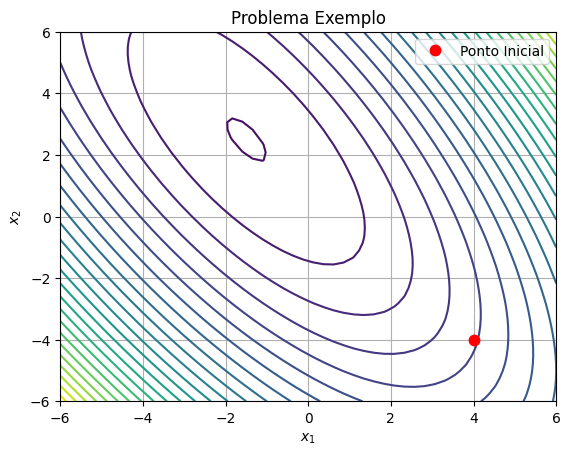

In [2]:
# Ponto inicial
x0 = np.zeros(2) 
x0[0] = 4
x0[1] = -4

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Definição do vetor gradiente
def gradiente(x):
    x1, x2 = x[0], x[1]
    g = np.zeros((2, 1))
    g[0] = 4*x1 + 2*x2 + 1
    g[1] = 2*x2 + 2*x1 - 2
    return g
    
# Definição da matriz hessiana
def hessiana(x):
    H = np.zeros((2, 2))
    H[0, 0] = 4
    H[0, 1] = 2
    H[1, 0] = 2
    H[1, 1] = 2
    return H

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))

# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Plota trajetória
plt.contour(x1, x2, f, levels=30)
plt.plot(x0[0], x0[1], '.r', label='Ponto Inicial', markersize=15)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()

## Aplicando o Método do Gradiente

Solução ótima: [-1.49920058  2.49908153]
Número de iterações: 30
Número de avaliações: 827


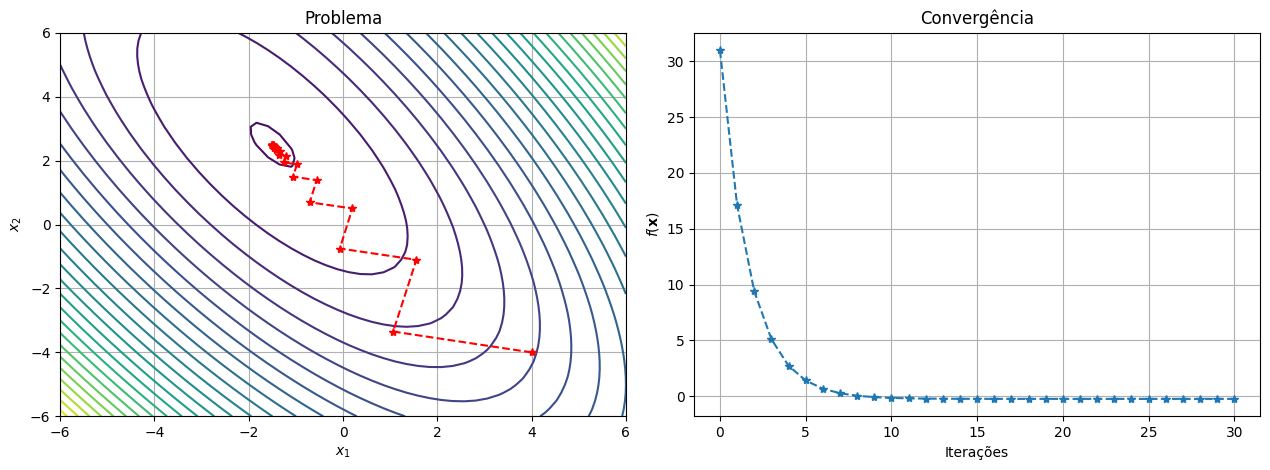

In [3]:
solucao = Gradiente(SecaoAurea(precisao=1e-2, passo=1e-3), maxit=30,
                    maxaval=5000).resolva(fx, x0)

print(solucao)
solucao.resultados(fx, [-6., 6.], [-6., 6.])

## Aplicando o Método de Newton

Solução ótima:  [-1.5  2.5]


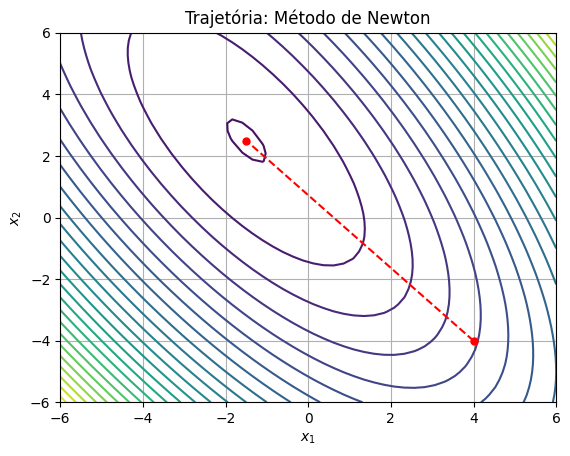

In [4]:
# Calcula o gradiente
g = gradiente(x0)

# Calcula a hessiana
H = hessiana(x0)

# Redefine o ponto x0 no formato (2x1) apenas para questões de
# multiplicação de matrizes no Python
x0 = x0.reshape((2, 1))

# Método de Newton
xopt = x0 - inv(H)@g

# Informa a solução ótima
print("Solução ótima: ", str(xopt.reshape(2)))

# Exibe a trajetória
plt.contour(x1, x2, f, levels=30)
plt.plot([x0[0], xopt[0]], [x0[1], xopt[1]], '--.r', markersize=10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Trajetória: Método de Newton')
plt.grid()
plt.show()

## Função não-quadrática

Seja o seguinte problema de otimização:
\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x}) = &~ 100(x_2-x_1^2)^2 + (1-x_1)^2 \\
    & \mathbf{x}\in\mathbb{R}^2 &
\end{align}

Essa função não é quadrática.

Para essa função objetivo, a expressão analítica do vetor gradiente é:
\begin{equation}
    \nabla f(\mathbf{x}) = \begin{bmatrix} -400x_1(x_2-x_1^2) - 2(1-x_1) \\ 200(x_2-x_1^2) \end{bmatrix}
\end{equation}

Além disso, a matrix hessiana também pode ser expressa analiticamente como:
\begin{equation}
    H(\mathbf{x}) = \begin{bmatrix} -400(x_2-x_1^2) + 800x_1^2 + 2 & -400x_1 \\ -400x_1 & 200 \end{bmatrix}
\end{equation}

Vamos pressupor que o ponto inicial para o nosso algoritmo de otimização seja $\mathbf{x_0} = \begin{bmatrix} -0.5 \\ 0.5 \end{bmatrix}$.

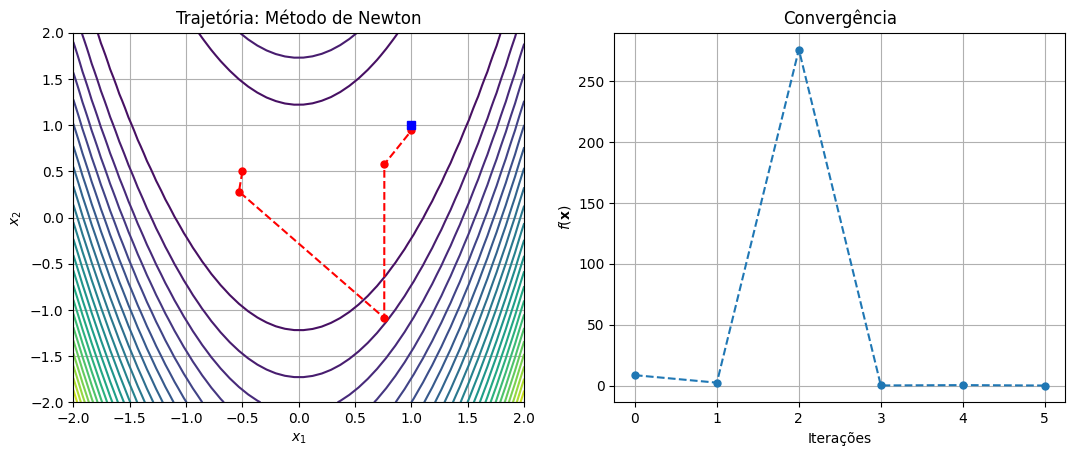

In [5]:
# Definição do ponto inicial
x0 = np.zeros((2, 1))
x0[0] = -0.5
x0[1] = 0.5

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 100*(x2-x1**2)**2 + (1-x1)**2

# Definição do vetor gradiente
def gradiente(x):
    x1, x2 = x.flatten()[0], x.flatten()[1]
    g = np.zeros((2, 1))
    g[0] = -400*x1*(x2-x1**2) - 2*(1-x1)
    g[1] = 200*(x2-x1**2)
    return g
    
# Definição da matriz hessiana
def hessiana(x):
    x1, x2 = x[0, 0], x[1, 0]
    H = np.zeros((2, 2))
    H[0, 0] = -400*(x2-x1**2) + 800*x1**2 + 2
    H[0, 1] = -400*x1
    H[1, 0] = -400*x1
    H[1, 1] = 200
    return H

x = x0.copy()
xhist = [x0.copy()]
fxhist = [fx(x)]

for it in range(5):
    
    # Calcula o vetor gradiente
    g = gradiente(x)
    
    # Calcula a matriz hessiana
    H = hessiana(x)

    # Passo
    x = x - inv(H)@g

    xhist.append(x.copy())
    fxhist.append(fx(x))

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Avalia função para plotar contorno
f = 100*(x2-x1**2)**2 + (1-x1)**2

_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])

# Plota trajetória
xhist = np.array(xhist)
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--.r', markersize=10)
axis[0].plot(x[0], x[1], 'sb')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Trajetória: Método de Newton')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--.', markersize=10)
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()
plt.show()

### Método Newton Modificado

Podemos modificar o método para que não aconteça casos onde ele toma passos que aumentam a função-objetivo. Basta fazermos a direção de busca como $-H^{-1}(x)\nabla f(\mathbf{x})$ e aplicarmos um método de otimização unidimensional para determinar o passo ótimo.

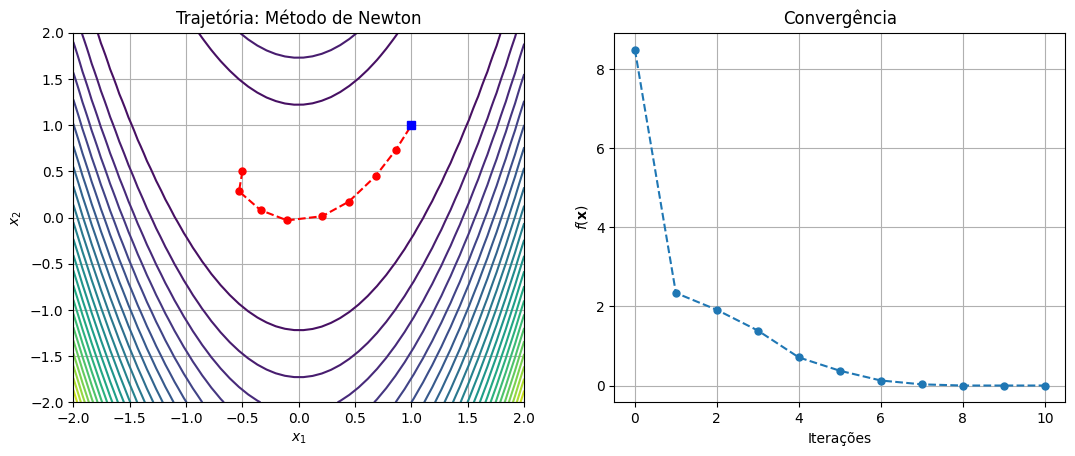

In [6]:
x = x0.copy()
xhist = [x0.copy()]
fxhist = [fx(x)]

for it in range(10):

    # Avaliação do gradiente (análitico)
    g = gradiente(x)

    # Avaliação da hessiana (análitico)
    H = hessiana(x)

    # Determina a direção de busca
    d = - inv(H) @ g
    
    # Função para otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo
    alpha, _ = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)

    # Aplica o passo na direção certa
    x = x + alpha * d
    
    xhist.append(x.copy())
    fxhist.append(fx(x))

_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])

# Plota trajetória
xhist = np.array(xhist)
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--.r', markersize=10)
axis[0].plot(x[0], x[1], 'sb')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Trajetória: Método de Newton')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--.', markersize=10)
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()
plt.show()

### Verificando o comportamento do Método do Gradiente

Solução ótima: [0.99696129 0.99391044]
Número de iterações: 800
Número de avaliações: 7665


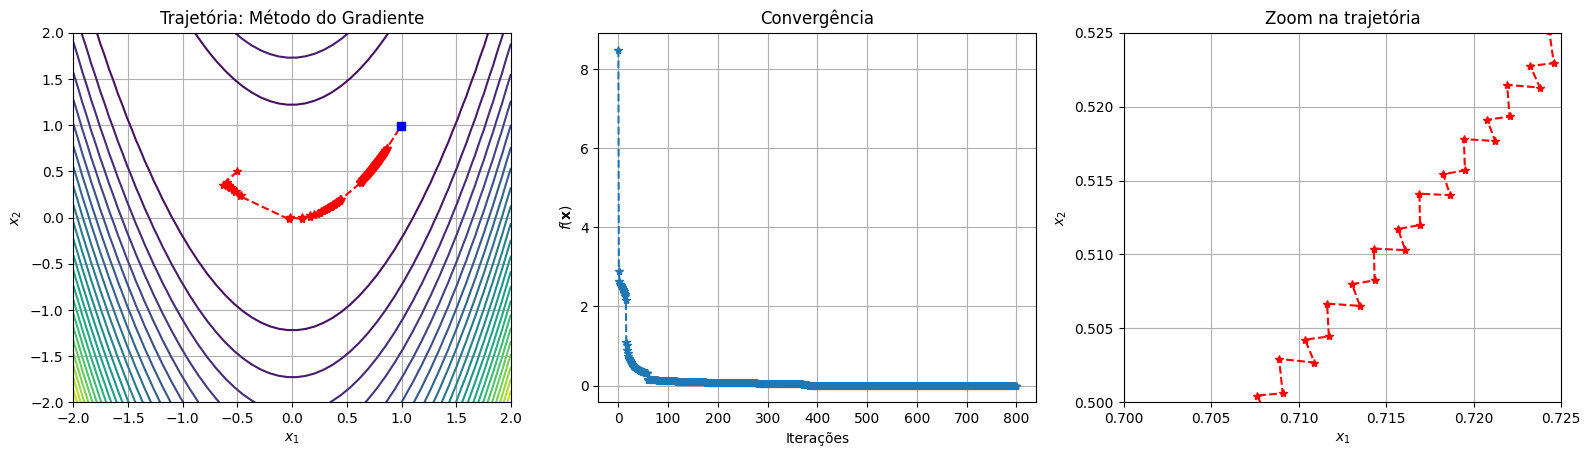

In [7]:
solucao = Gradiente(SecaoAurea(precisao=1e-2, passo=1e-3), maxit=800,
                    maxaval=15000).resolva(fx, x0.reshape(2))
print(solucao)

_, axis = plt.subplots(ncols=3, figsize=[3*6.4, 4.8])

# Plota trajetória
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(solucao.xhist[:, 0], solucao.xhist[:, 1], '--*r')
axis[0].plot(solucao.x[0], solucao.x[1], 'sb')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Trajetória: Método do Gradiente')
axis[0].grid()

# Plota convergencia
axis[1].plot(solucao.fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

# Zoom na trajetória
axis[2].contour(x1, x2, f, levels=1000)
axis[2].plot(solucao.xhist[:, 0], solucao.xhist[:, 1], '--*r')
axis[2].plot(solucao.x[0], solucao.x[1], 'sb')
axis[2].set_xlim(.7, .725)
axis[2].set_ylim(.5, .525)
axis[2].set_xlabel(r'$x_1$')
axis[2].set_ylabel(r'$x_2$')
axis[2].set_title('Zoom na trajetória')
axis[2].grid()

plt.show()

## Como estimar a Hessiana

In [8]:
def hessiana(x, func, grad, delta=1e-5):
    
    # A Hessiana é uma matriz quadrada do tamanho do número de variáveis
    H = np.zeros((x.size, x.size))
    
    # Contador de avaliações
    navaliacoes = 0
    
    # Para cada variável...
    for n in range(x.size):
        
        # Perturbação na n-ésima variável
        e = np.zeros(x.shape)
        e[n] = 1

        # Calcula o gradiente nesse ponto perturbado
        gpert, nava = otimo.gradiente(x + delta*e, func)
        
        navaliacoes += nava

        # Calcula uma coluna da Hessiana
        H[:, n] = np.reshape(gpert-grad, (2))/delta

    return H, navaliacoes

### Método de Newton (com aproximação do gradiente e hessiana)

Número de avaliações: 303


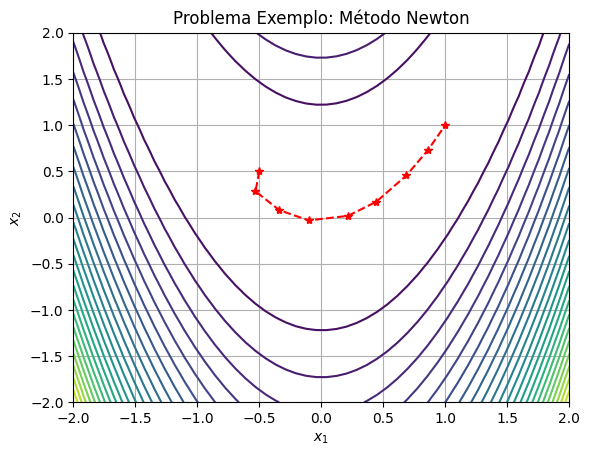

In [9]:
x = x0.copy()
feval = fx(x)
xhist = [x0.copy()]
navaliacoes = 1

for it in range(8):

    # Estima a derivada
    g, nava = otimo.gradiente(x, fx, feval)
    navaliacoes += nava

    # Estima a hessiana
    H, nava = hessiana(x, fx, g, delta=1e-5)
    navaliacoes += nava
        
    # Determina a direção de busca
    d = - inv(H) @ g.reshape((-1, 1))
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Da o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    xhist.append(x.copy())

print('Número de avaliações: %d' % navaliacoes)

# Plota trajetória
xlist = np.array(xhist)
plt.contour(x1, x2, f, levels=30)
plt.plot(xlist[:, 0], xlist[:, 1], '--*r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo: Método Newton')
plt.grid()
plt.show()

## Exemplo de aplicação em funções com mínimos locais não-estritos

Considere o seguinte problema de otimização:
\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}}& f(\mathbf{x}) = x_1^4 \\
    & \mathbf{x}\in\mathbb{R}^2
\end{align}

O mínimo dessa função é qualquer ponto no qual $x_1=0$. Logo, ela possui múltiplos mínimos locais não-estritos, porque existem vizinhos de mesmo valor de $f(\mathbf{x})$. Nesse tipo de problema, o Método de Newton pode ter comportamento indefinido porque a matriz Hessiana pode não ser inversível. Nesses casos, o método do gradiente pode resolver o problema.

Matriz Hessiana não-inversível!
Número de avaliações: 9


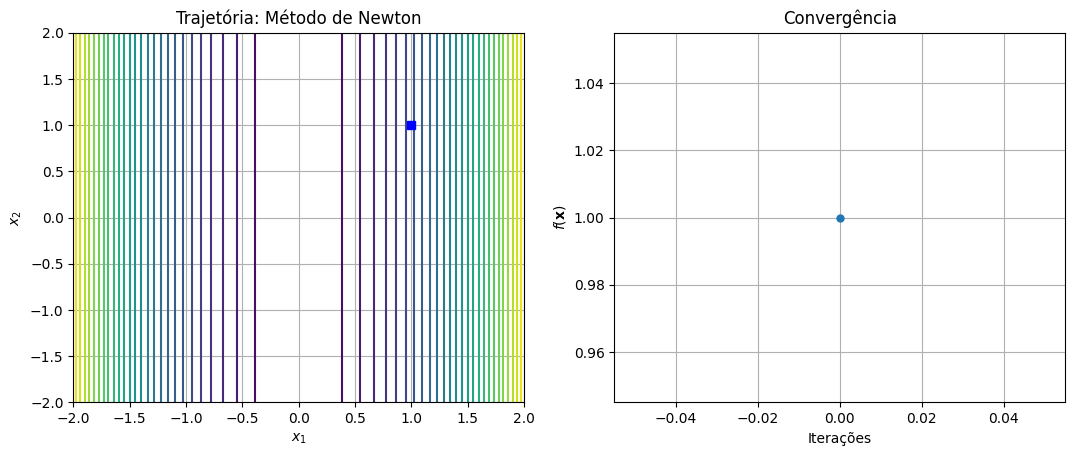

In [10]:
x0 = np.zeros((2, 1))
x0[0] = 1.
x0[1] = 1.

def fx(x):
    x1, x2 = x[0], x[1]
    return x1**2

x = x0.copy()
feval = fx(x)
xhist = [x0.copy()]
fxhist = [feval]
navaliacoes = 1

for it in range(10):

    # Estima a derivada
    g, nava = otimo.gradiente(x, fx, feval)
    navaliacoes += nava

    # Estima a hessiana
    H, nava = hessiana(x, fx, g, delta=1e-5)
    navaliacoes += nava
        
    # Determina a direção de busca
    try:
        d = - inv(H) @ g
    except:
        print('Matriz Hessiana não-inversível!')
        break
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Da o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    xhist.append(x.copy())
    fxhist.append(feval)

print('Número de avaliações: %d' % navaliacoes)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Avalia função para plotar contorno
f = x1**2

_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])

# Plota trajetória
xhist = np.array(xhist)
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--.r', markersize=10)
axis[0].plot(x[0], x[1], 'sb')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Trajetória: Método de Newton')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--.', markersize=10)
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.show()

Em outras situações, a matriz Hessiana pode até ser inversível, mas pode ter um determinante bem próximo de zero ou pode inclusive apontar no sentido de maximização.

Considere por exemplo:
\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}}& f(\mathbf{x}) = x_1^4 + x_2^4 - 4x_1x_2\\
    & \mathbf{x}\in\mathbb{R}^2
\end{align}

Essas função tem um mínimo local que é $(x_1, x_2) = (0, 0)$ e dois mínimos globais $(x_1, x_2) = (1, 1)$ e $(x_1, x_2) = (-1, -1)$. Dependendo de onde estiver o ponto inicial, o algoritmo pode convergir para diferentes lugares. Além disso, no ponto $\mathbf{x_0} = <-0.5, 0.5>$, a direção de busca aponta no sentido de maximização. Logo, para corrigir isso, precisamos multiplicar a direção de busca por $-1$. Para identificarmos isso, precisamos lembrar que todo o vetor $\mathbf{d}$ cujo o produto escalar $\mathbf{d}\cdot\nabla f$ seja menor que zero, aponta no sentido de minimização. Logo, precisamos verificar se $\mathbf{d}\cdot\nabla f > 0$, e assim, multiplicar por $-1$ o vetor direção de busca.

Inverte direção de busca.
Inverte direção de busca.
Número de avaliações: 313


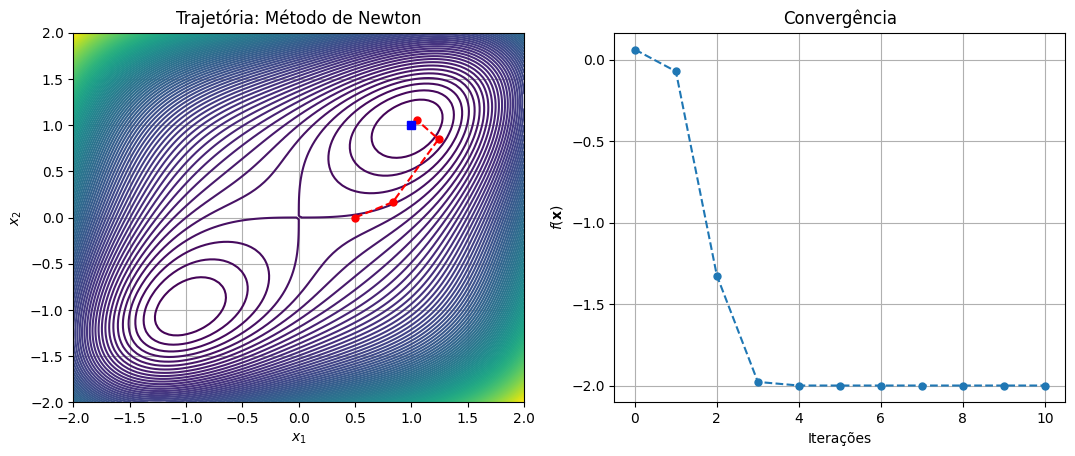

In [11]:
# Definição do ponto inicial
x0 = np.zeros((2, 1))
x0[0] = .5
x0[1] = 0.

# Um ponto inicial que converge para (0, 0) é x0 = (0.5, -0.5)

# Definição da função objetivo.
def fx(x):
    x1, x2 = x[0], x[1]
    return x1**4 + x2**4 - 4*x1*x2

x = x0.copy()
feval = fx(x)
xhist = [x0.copy()]
fxhist = [feval]
navaliacoes = 1

for it in range(10):

    # Estima a derivada
    g, nava = otimo.gradiente(x, fx, feval)
    navaliacoes += nava

    # Estima a hessiana
    H, nava = hessiana(x, fx, g, delta=1e-5)
    navaliacoes += nava
        
    # Determina a direção de busca
    d = -inv(H) @ g.reshape((-1, 1))
    
    if d.T @ g > 0:
        print("Inverte direção de busca.")
        d = -d
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Da o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    xhist.append(x.copy())
    fxhist.append(feval)

print('Número de avaliações: %d' % navaliacoes)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                     np.linspace(-2, 2, 100))

# Avalia função para plotar contorno
f = x1**4 + x2**4 - 4*x1*x2

_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])

# Plota trajetória
xhist = np.array(xhist)
axis[0].contour(x1, x2, f, levels=100)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--.r', markersize=10)
axis[0].plot(x[0], x[1], 'sb')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Trajetória: Método de Newton')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--.', markersize=10)
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.show()

## Teste de outras funções-objetivo

### Beale

Solução ótima: [3.00021062 0.50009177]
Número de iterações: 69
Número de avaliações: 4024


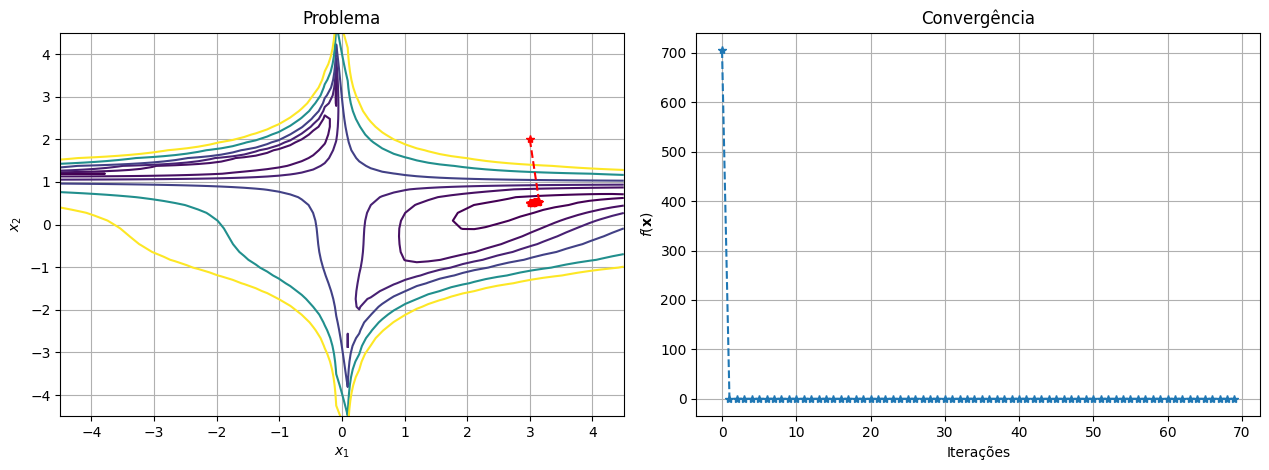

In [12]:
# Definição da função objetivo
def beale(x):
    x1, x2 = x[0], x[1]
    return ((1.5 - x1 + x1*x2)**2 + (2.25-x1+x1*x2**2)**2
            + (2.625 - x1 + x1*x2**3)**2) 
    
# Sugestões de pontos iniciais
x0 = [3., 2.]
# x0 = np.array([2., 2.])

solucao = Newton(SecaoAurea(precisao=1e-3, passo=1e-4), maxit=200,
                    maxaval=5000).resolva(beale, x0)

print(solucao)
solucao.resultados(beale, [-4.5, 4.5], [-4.5, 4.5], levels=[1, 5, 10, 20, 50, 100])

### Ackley

Solução ótima: [-0.00410568  0.0041055 ]
Número de iterações: 3
Número de avaliações: 33


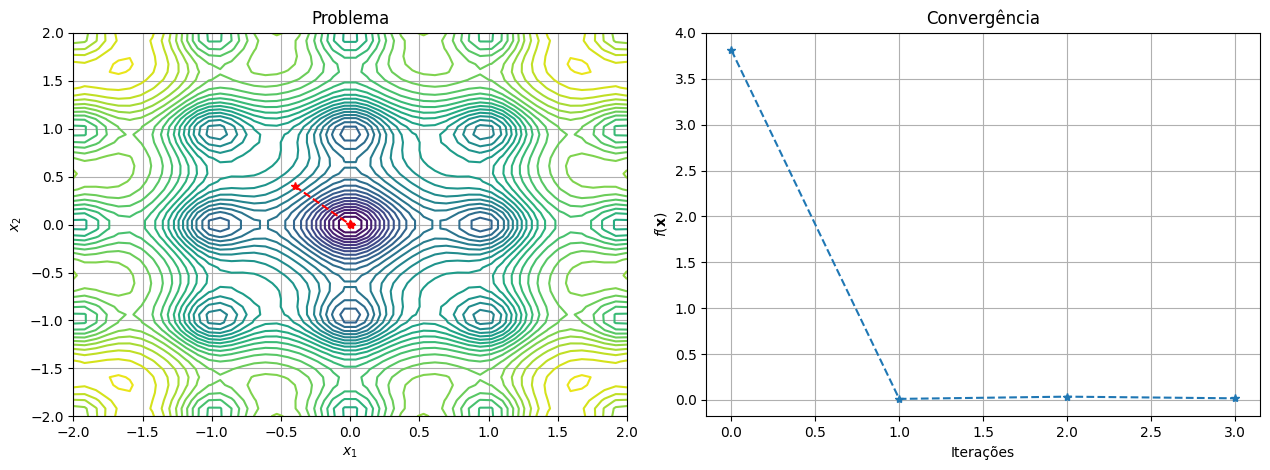

In [13]:
# Definição da função objetivo
def ackley(x):
    x1, x2 = x[0], x[1]
    return (-20*np.exp(-0.2*np.sqrt(0.5*(x1**2+x2**2)))
            - np.exp(0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2)))
            + np.exp(1) + 20)

# Sugestão de ponto inicial
x0 = np.array([-0.4, 0.4])

solucao = Gradiente(SecaoAurea(precisao=1e-2), maxit=3,
                    maxaval=5000).resolva(ackley, x0)

print(solucao)
solucao.resultados(ackley, [-2, 2], [-2, 2])